# Currencies Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [4]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [5]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [6]:
# symbol: (description, multiplier)


currencies = {
#     'BTCUSD=X': 'Bitcoin USD Futures', 1),
#     'ETHUSD=X': 'Ethereum USD 
    'EURUSD=X': 'EUR/USD Futures',
    'JPY=X':    'USD/JPY Futures',
    'GBPUSD=X': 'GBP/USD Futures',
    'AUDUSD=X': 'AUD/USD Futures',
    'NZDUSD=X': 'NZD/USD Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'GBPJPY=X': 'GBP/JPY Futures',
    'EURGBP=X': 'EUR/GBP Futures',
    'EURCAD=X': 'EUR/CAD Futures',
    'EURSEK=X': 'EUR/SEK Futures',
    'EURCHF=X': 'EUR/CHF Futures',
    'EURHUF=X': 'EUR/HUF Futures',
    'EURJPY=X': 'EUR/JPY Futures',
    'CNY=X':    'USD/CNY Futures',
    'HKD=X':    'USD/HKD Futures',
    'SGD=X':    'USD/SGD Futures',
    'INR=X':    'USD/INR Futures',
    'MXN=X':    'USD/MXN Futures',
    'PHP=X':    'USD/PHP Futures',
    'IDR=X':    'USD/IDR Futures',
    'THB=X':    'USD/THB Futures',
    'MYR=X':    'USD/MYR Futures',
    'ZAR=X':    'USD/ZAR Futures',
    'RUB=X':    'USD/RUB Futures'
}

symbols = list(currencies)
#symbols = ['EURUSD=X']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [7]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 0,
    'use_regime_filter' : True,
    'use_vola_weight' : False
}

Run Strategy

In [8]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********




View log DataFrames: raw trade log, trade log, and daily balance

In [9]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2007-02-19,0,1.62,2680,entry,LONG,EURCHF=X
1,2007-02-19,1,1.32,3305,entry,LONG,EURUSD=X
2,2007-02-19,2,1.53,2840,entry,LONG,EURCAD=X
3,2007-02-19,3,7.81,556,entry,LONG,HKD=X
4,2007-02-19,4,9.23,470,entry,LONG,EURSEK=X


In [10]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2007-02-19,1.53,2007-02-21,1.52,-0.01,-18.46,2840,-18.46,LONG,EURCAD=X
1,2007-02-19,1.62,2007-02-26,1.62,-0.00,-0.54,2680,-19.00,LONG,EURCHF=X
2,2007-02-19,0.70,2007-03-05,0.67,-0.03,-167.79,6205,-186.79,LONG,NZDUSD=X
3,2007-02-19,7.81,2007-03-08,7.81,0.00,2.11,556,-184.68,LONG,HKD=X
4,2007-02-19,9.23,2007-03-23,9.30,0.06,29.23,470,-155.44,LONG,EURSEK=X


In [11]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-06-28,105819.93,105819.93,105819.93,4883,78276.85,1.00,X
2021-06-29,105846.75,105846.75,105846.75,5475,73681.29,1.00,O
2021-06-30,105889.95,105889.95,105889.95,9675,69078.38,1.00,O
2021-07-01,105925.02,105925.02,105925.02,5475,73684.10,1.00,X
2021-07-02,106008.22,106008.22,106008.22,4202,101399.71,1.00,X


Generate strategy stats - display all available stats

In [12]:
pf.print_full(s.stats)

start                                                   2007-02-19
end                                                     2021-07-02
beginning_balance                                           100000
ending_balance                                           106008.22
total_net_profit                                           6008.22
gross_profit                                              72416.56
gross_loss                                               -66408.35
profit_factor                                                 1.09
return_on_initial_capital                                     6.01
annual_return_rate                                            0.41
trading_period                           14 years 4 months 13 days
pct_time_in_market                                          100.00
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
EURGBP=X,"$1,012.61",0.04,0.17,3.88
INR=X,"$2,276.20",0.04,0.38,8.71
THB=X,"-$1,456.00",0.04,-0.24,-5.57
MYR=X,"$1,365.59",0.04,0.23,5.23
MXN=X,$527.10,0.04,0.09,2.02
EURCHF=X,-$709.74,0.04,-0.12,-2.72
ZAR=X,"$2,619.07",0.04,0.44,10.03
CNY=X,$599.45,0.04,0.10,2.29
EURUSD=X,-$271.72,0.04,-0.05,-1.04
EURCAD=X,-$75.80,0.04,-0.01,-0.29


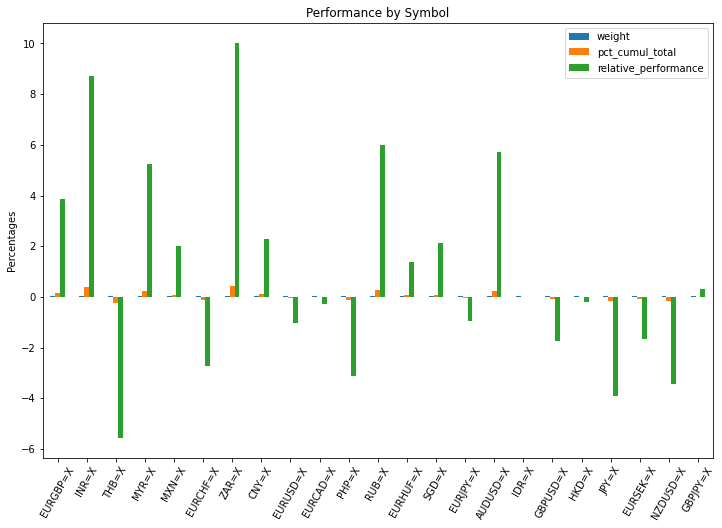

In [13]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,EURGBP=X,INR=X,THB=X,MYR=X,MXN=X,EURCHF=X,ZAR=X,CNY=X,EURUSD=X,EURCAD=X,...,SGD=X,EURJPY=X,AUDUSD=X,IDR=X,GBPUSD=X,HKD=X,JPY=X,EURSEK=X,NZDUSD=X,GBPJPY=X
EURGBP=X,1.00,0.01,-0.09,-0.04,0.08,0.11,-0.01,0.01,0.33,0.42,...,-0.11,0.19,0.02,-0.00,-0.47,-0.01,-0.14,0.13,0.03,-0.46
INR=X,0.01,1.00,0.15,0.10,0.13,-0.05,0.31,0.09,-0.18,0.04,...,0.36,-0.24,-0.32,0.01,-0.23,0.07,-0.03,0.13,-0.29,-0.22
THB=X,-0.09,0.15,1.00,0.12,0.05,-0.06,0.17,0.06,-0.20,-0.08,...,0.26,-0.17,-0.17,0.03,-0.15,0.17,0.02,0.05,-0.18,-0.10
MYR=X,-0.04,0.10,0.12,1.00,0.25,-0.02,0.17,0.04,-0.16,-0.02,...,0.27,-0.15,-0.22,0.02,-0.16,0.09,0.02,0.07,-0.20,-0.11
MXN=X,0.08,0.13,0.05,0.25,1.00,-0.09,0.35,0.04,-0.18,0.13,...,0.23,-0.23,-0.31,0.01,-0.22,0.00,-0.17,0.19,-0.28,-0.26
EURCHF=X,0.11,-0.05,-0.06,-0.02,-0.09,1.00,-0.20,-0.00,0.20,0.09,...,-0.13,0.37,0.19,0.00,0.16,0.00,0.18,-0.04,0.17,0.27
ZAR=X,-0.01,0.31,0.17,0.17,0.35,-0.20,1.00,0.11,-0.36,0.10,...,0.58,-0.44,-0.63,0.03,-0.42,0.06,-0.10,0.30,-0.59,-0.38
CNY=X,0.01,0.09,0.06,0.04,0.04,-0.00,0.11,1.00,-0.08,-0.01,...,0.15,-0.05,-0.09,0.02,-0.10,0.04,0.03,0.07,-0.11,-0.05
EURUSD=X,0.33,-0.18,-0.20,-0.16,-0.18,0.20,-0.36,-0.08,1.00,0.41,...,-0.54,0.49,0.44,-0.03,0.48,-0.11,0.17,-0.09,0.46,0.24
EURCAD=X,0.42,0.04,-0.08,-0.02,0.13,0.09,0.10,-0.01,0.41,1.00,...,-0.10,0.17,-0.09,-0.02,0.13,-0.02,-0.23,0.24,-0.04,-0.11


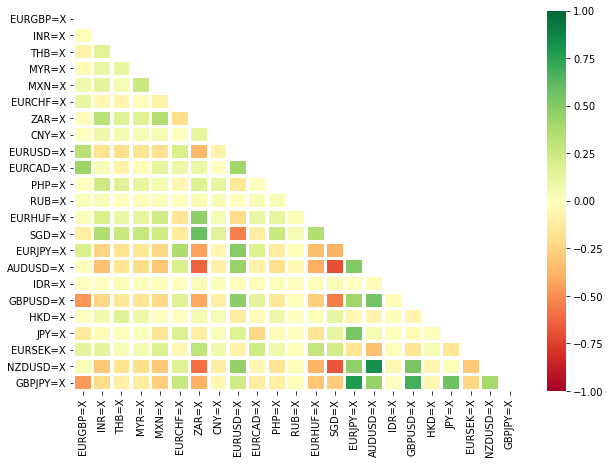

In [14]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [15]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

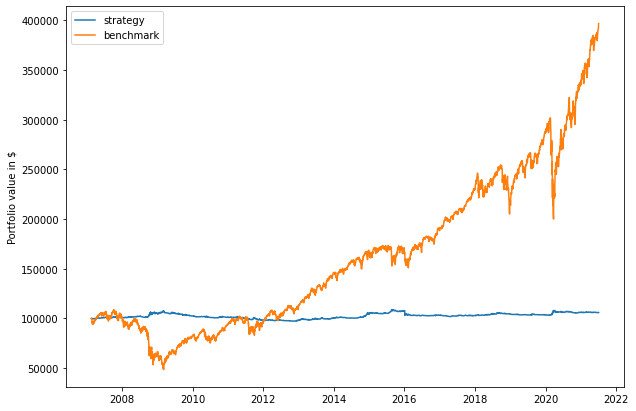

In [16]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,0.41,10.07
max_closed_out_drawdown,-9.68,-55.18
annualized_return_over_max_drawdown,0.04,0.18
best_month,4.82,23.62
worst_month,-4.16,-30.99
sharpe_ratio,0.18,0.57
sortino_ratio,0.19,0.68
monthly_std,0.66,4.79
annual_std,2.52,17.31


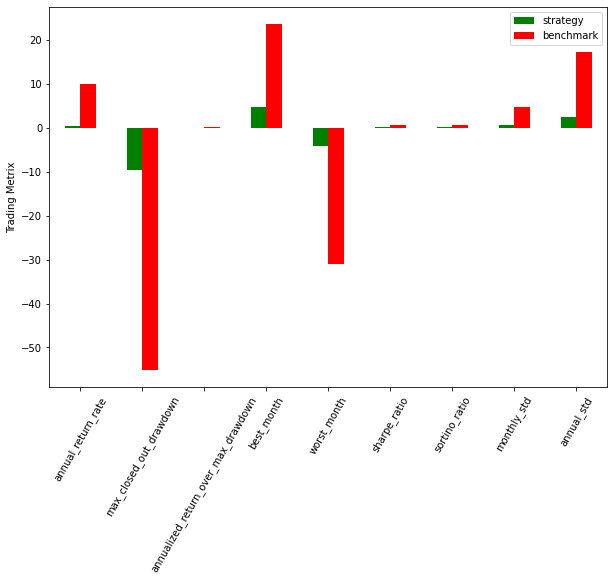

In [17]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [18]:
kelly = pf.kelly_criterian(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.18
sharpe_ratio_max        0.23
sharpe_ratio_min        0.13
strategy risk           0.03
instrument risk         0.17
optimal target risk     0.18
half kelly criterian    0.09
aggressive leverage     1.02
moderate leverage       0.51
conservative leverage   0.36
dtype: float64